## INM 702 Coursework Code: Task 6
## Implementation of a fully connected Neural Network on CK+ dataset, using keras
### By: Jasveen Kaur and Nikhil Vallakati


### Importing packages

In [32]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import regularizers, optimizers, preprocessing
from keras.layers import Conv2D, MaxPool2D

from keras import backend as K
from keras.layers.normalization import BatchNormalization

import pandas as pd
import io
import os
import requests
import numpy as np
import pickle

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

import seaborn as sns
import base64


### Data Loading and Preprocessing

In [33]:
data = pd.read_pickle('./ck_final.pickle')

In [34]:
(training_data, validation_data, test_data) = data['training_data'], data['validation_data'], data['test_data']
(X_train, y_train), (X_val, y_val), (X_test, y_test) = (training_data[0],training_data[1]), (validation_data[0],validation_data[1]), (test_data[0],test_data[1])

# input image dimensions
img_rows, img_cols = data['img_dim']['width'], data['img_dim']['height']

In [35]:
# Converting the labels to their categorical form (similar to one-hot encoding)
num_labels = 8
Y_train = np_utils.to_categorical(y_train, num_labels)
Y_val = np_utils.to_categorical(y_val, num_labels)
Y_test = np_utils.to_categorical(y_test, num_labels)

### Model training using Random Forest Classifier

In [36]:
Random_Forest_model = RandomForestClassifier(n_estimators=200,criterion="entropy")
RFC_model = Random_Forest_model.fit(X_train, y_train.ravel())
pred = Random_Forest_model.predict(X_test)

#Calculating the accuracy and f1 score of the trained model
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test, pred, average='weighted')

print("Training Accuracy:","{:.2f}".format(accuracy*100), '%')
print("F1 score:" ,"{:.2f}".format(f1))

The accuracy is:  59.774011299435024 %
F1 score: 0.559198


C:\Users\asus\anaconda3.7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


            Confusion Matrix
[[171  27   0   0   2  11   0  16]
 [ 48  59   0   0   0   0   6   0]
 [ 13  14   0   0   0   0   0   0]
 [ 44  13   0  38   0   3   0   0]
 [ 37   0   0   0   6  18   0   0]
 [ 11   0   0   0   0 135   0   2]
 [ 53   0   0   0   0   0   0   8]
 [ 28   0   0   0   0   2   0 120]]


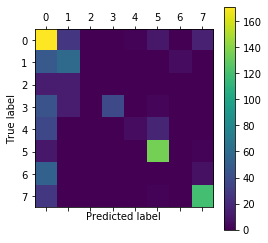

In [45]:
cm = confusion_matrix(y_test, pred)
print("            Confusion Matrix")
print(cm)

plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [46]:
# Reshaping to create a tensor
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

### Model

In [92]:
batch_size = 16
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

#model.add(Conv2D(512, (3, 3), activation='relu'))
#model.add(Flatten())
#model.add(Dense(, activation = 'relu'))
#model.add(Dropout(0.3))
#model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(num_labels, activation='softmax'))

In [93]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 98, 98, 32)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 46, 46, 128)      

In [94]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### Training the model

In [95]:
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, Y_val))

Train on 4117 samples, validate on 874 samples
Epoch 1/10
4117/4117 [==============================] - 141s 34ms/step - loss: 4.8893 - accuracy: 0.6211 - val_loss: 13.4845 - val_accuracy: 0.0286
Epoch 2/10
4117/4117 [==============================] - 141s 34ms/step - loss: 1.7285 - accuracy: 0.8050 - val_loss: 3.9742 - val_accuracy: 0.5092
Epoch 3/10
4117/4117 [==============================] - 138s 33ms/step - loss: 1.4036 - accuracy: 0.8382 - val_loss: 3.0505 - val_accuracy: 0.6556
Epoch 4/10
4117/4117 [==============================] - 138s 34ms/step - loss: 1.2084 - accuracy: 0.8540 - val_loss: 3.0388 - val_accuracy: 0.6522
Epoch 5/10
4117/4117 [==============================] - 136s 33ms/step - loss: 1.0002 - accuracy: 0.8759 - val_loss: 3.0679 - val_accuracy: 0.6419
Epoch 6/10
4117/4117 [==============================] - 141s 34ms/step - loss: 0.8784 - accuracy: 0.8905 - val_loss: 2.7345 - val_accuracy: 0.7140
Epoch 7/10
4117/4117 [==============================] - 144s 35ms/step

### Evaluating the trained model

In [111]:
score = model.evaluate(X_val, Y_val, verbose=0)
print("Validation accuracy:","{:.2f}".format(score[1]*100), '%')
print("Validation loss:","{:.2f}".format(score[0]))

Validation accuracy: 66.82 %
Validation loss: 3.59


In [112]:
# predict probabilities for test set
y_probs = model.predict(X_test, verbose=0)
# predict classes for test set
y_pred = model.predict_classes(X_test, verbose=0)

In [113]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:","{:.2f}".format(accuracy*100), '%')
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:" ,"{:.2f}".format(f1))

Test Accuracy: 60.23 %
F1 score: 0.57


### Plotting the Loss and Accuracy

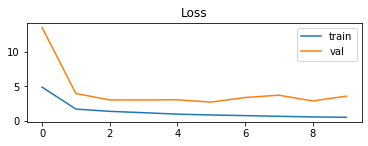

In [125]:
#plot loss
plt.subplot(212)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

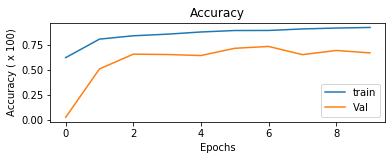

In [124]:
# plot accuracy 
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy ( x 100)')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

### Confusion Matrix

          Confusion Matrix
[[126   0   0  25   0  16  14  46]
 [ 42  35   0  22   7   0   0   7]
 [ 26   1   0   0   0   0   0   0]
 [ 11   0   0  74   0   2   0  11]
 [  6   0   0   4   5  13  33   0]
 [  6   0   0   4   4 129   0   5]
 [  9   0   3   0   1   0  43   5]
 [ 28   0   0   1   0   0   0 121]]


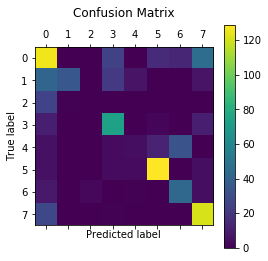

In [116]:
cm = confusion_matrix(y_test, y_pred)
print("          Confusion Matrix")
print(cm)
plt.matshow(cm)
plt.title('Confusion Matrix\n')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The Model gives 92.08% test accuracy, 66.82% validation accuracy and 60.23% test accuracy with 4 layer (1 input, 2 hidden and 3 output) neural network. The nwural network had 3 convolutional layers followed by relu activation, dropout and batch normalization and one dense layer followed by softmax activation function.